<h2>Домашнее задание №1 по курсу "Проектирование интеллектуальных систем"</h2>

<p><b>Выполнил:</b> Саврасов П.А. группа ИУ5-24М</p>

<h3>Задание</h3>
<p>Для выполнения домашнего задания требуется обучить нейронную сеть на собственном датасете, созданном в домашнем задании №1</p>

In [2]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.datasets import fetch_20newsgroups

В даненом домашнем задании сравним несколько моделей (MLP, RNN) в задаче классификации текста, так же сравним несколько векторизаторов текста.<br>
Для начала загрузим датасет из домашнегно задания 1

In [3]:
with open('messages.json', 'r') as file: 
    data = json.loads(file.read())

data = pd.json_normalize(data['messages'])

Для векторизации текстов применим 2 векторизатора: TfidfVectorizer, CountVectorizer

In [4]:
xData = []
inputDims = []


vectorizer = TfidfVectorizer()
xData.append(vectorizer.fit_transform(data['content']).toarray())
inputDims.append(len(vectorizer.get_feature_names()))

vectorizer = CountVectorizer()
xData.append(vectorizer.fit_transform(data['content']).toarray())
inputDims.append(len(vectorizer.get_feature_names()))


In [5]:
models = []
for inputDim in inputDims:
    
    model = tf.keras.Sequential(
        [
            layers.InputLayer(input_shape=(inputDim)),
            layers.Dense(300, activation='relu'),
            layers.Dense(200, activation='relu'),
            layers.Dense(100, activation='relu'),
            layers.Dense(2, activation='relu')
        ]
    )
    models.append(model)
    
    

In [6]:
for model in models:
    model.compile (
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=keras.optimizers.Adam(),
        metrics=['accuracy']
    )


In [7]:
xTrain = []
xTest = []
yTrain = []
yTest = []


for x in xData:
    x_train, x_test, y_train, y_test = train_test_split(x, data['target'], test_size=0.3, random_state=42)
    xTrain.append(x_train)
    xTest.append(x_test)
    yTrain.append(y_train)
    yTest.append(y_test)

historys = [] 
    
for i in range(2):
    print(f'\n\nModel {i + 1}---------------')
    historys.append(models[i].fit(xTrain[i], yTrain[i],epochs=10, verbose=2))
    models[i].evaluate(xTest[i], yTest[i], verbose=2)
        



Model 1---------------
Epoch 1/10
276/276 - 2s - loss: 0.3191 - accuracy: 0.8924
Epoch 2/10
276/276 - 1s - loss: 0.2301 - accuracy: 0.9081
Epoch 3/10
276/276 - 1s - loss: 0.1811 - accuracy: 0.9285
Epoch 4/10
276/276 - 1s - loss: 0.1550 - accuracy: 0.9412
Epoch 5/10
276/276 - 1s - loss: 0.1382 - accuracy: 0.9463
Epoch 6/10
276/276 - 1s - loss: 0.1282 - accuracy: 0.9512
Epoch 7/10
276/276 - 1s - loss: 0.1205 - accuracy: 0.9513
Epoch 8/10
276/276 - 1s - loss: 0.1150 - accuracy: 0.9542
Epoch 9/10
276/276 - 1s - loss: 0.1132 - accuracy: 0.9540
Epoch 10/10
276/276 - 1s - loss: 0.1122 - accuracy: 0.9538
119/119 - 0s - loss: 0.3732 - accuracy: 0.9124


Model 2---------------
Epoch 1/10
276/276 - 2s - loss: 0.1794 - accuracy: 0.9589
Epoch 2/10
276/276 - 2s - loss: 0.0854 - accuracy: 0.9761
Epoch 3/10
276/276 - 2s - loss: 0.0723 - accuracy: 0.9764
Epoch 4/10
276/276 - 2s - loss: 0.0483 - accuracy: 0.9790
Epoch 5/10
276/276 - 2s - loss: 0.0443 - accuracy: 0.9784
Epoch 6/10
276/276 - 2s - loss: 

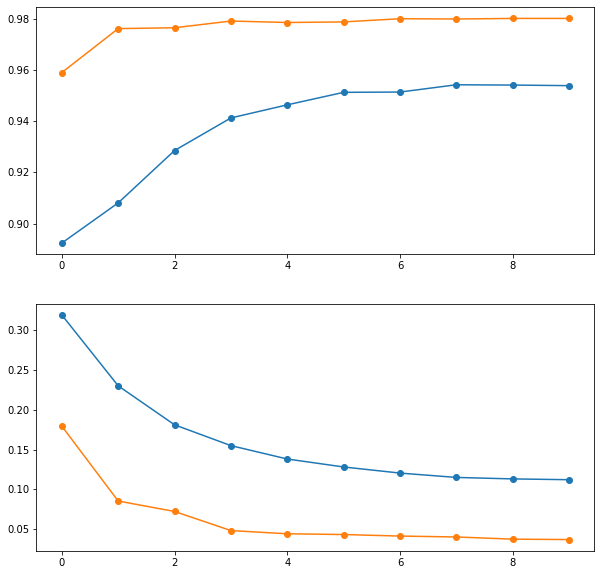

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.plot(historys[0].epoch, historys[0].history['accuracy'], '-o')
plt.plot(historys[1].epoch, historys[1].history['accuracy'], '-o')

plt.subplot(2, 1, 2)
plt.plot(historys[0].epoch, historys[0].history['loss'], '-o')
plt.plot(historys[1].epoch, historys[1].history['loss'], '-o')

plt.show()